In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

with open('/Data_EDA/pga.pickle', 'rb') as file:
    g = pickle.load(file)
g.head()

,money,name,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
0,25271,Robert Allenby,73.0,180,1971,51.0,55.06,2016,282.2,63.73,30.41,50.75,73.117,9,0.0,-0.491,-1.950,-0.631,-0.460,-0.368
1,271887,Robert Allenby,73.0,180,1971,63.0,63.06,2015,282.7,66.67,30.03,51.69,72.102,169,1.0,-0.754,-0.970,-0.262,0.260,-0.213
2,514288,Robert Allenby,73.0,180,1971,83.0,61.47,2014,284.9,67.63,29.85,59.96,70.920,438,0.0,-0.163,0.105,-0.050,0.552,-0.234
3,204272,Robert Allenby,73.0,180,1971,58.0,57.87,2013,284.9,62.40,29.64,52.77,72.056,129,1.0,-0.337,-0.859,-0.733,0.296,-0.085
4,808927,Robert Allenby,73.0,180,1971,76.0,59.34,2012,286.7,65.79,29.91,50.85,71.355,417,2.0,-0.428,-0.626,-0.449,0.537,-0.286


In [2]:
g.columns

Index(['money', 'name', 'height_inches', 'weight_lbs', 'birthyear', 'Rounds',
       'Fairway Percentage', 'Year', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG'],
      dtype='object')

In [3]:
g_small = g.drop(['Average Score', 'Points', 'Top 10', 'Average SG Total', 'Year','name', 'Average SG Putts', 'SG:OTT', 'SG:APR','SG:ARG'], axis=1)

In [4]:
g_small.head()

,money,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling
0,25271,73.0,180,1971,51.0,55.06,282.2,63.73,30.41,50.75
1,271887,73.0,180,1971,63.0,63.06,282.7,66.67,30.03,51.69
2,514288,73.0,180,1971,83.0,61.47,284.9,67.63,29.85,59.96
3,204272,73.0,180,1971,58.0,57.87,284.9,62.40,29.64,52.77
4,808927,73.0,180,1971,76.0,59.34,286.7,65.79,29.91,50.85


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

***
**Try Log Transformation**

In [7]:
import math
g_small['logmoney'] = g_small['money'].apply(lambda x: math.log(x))

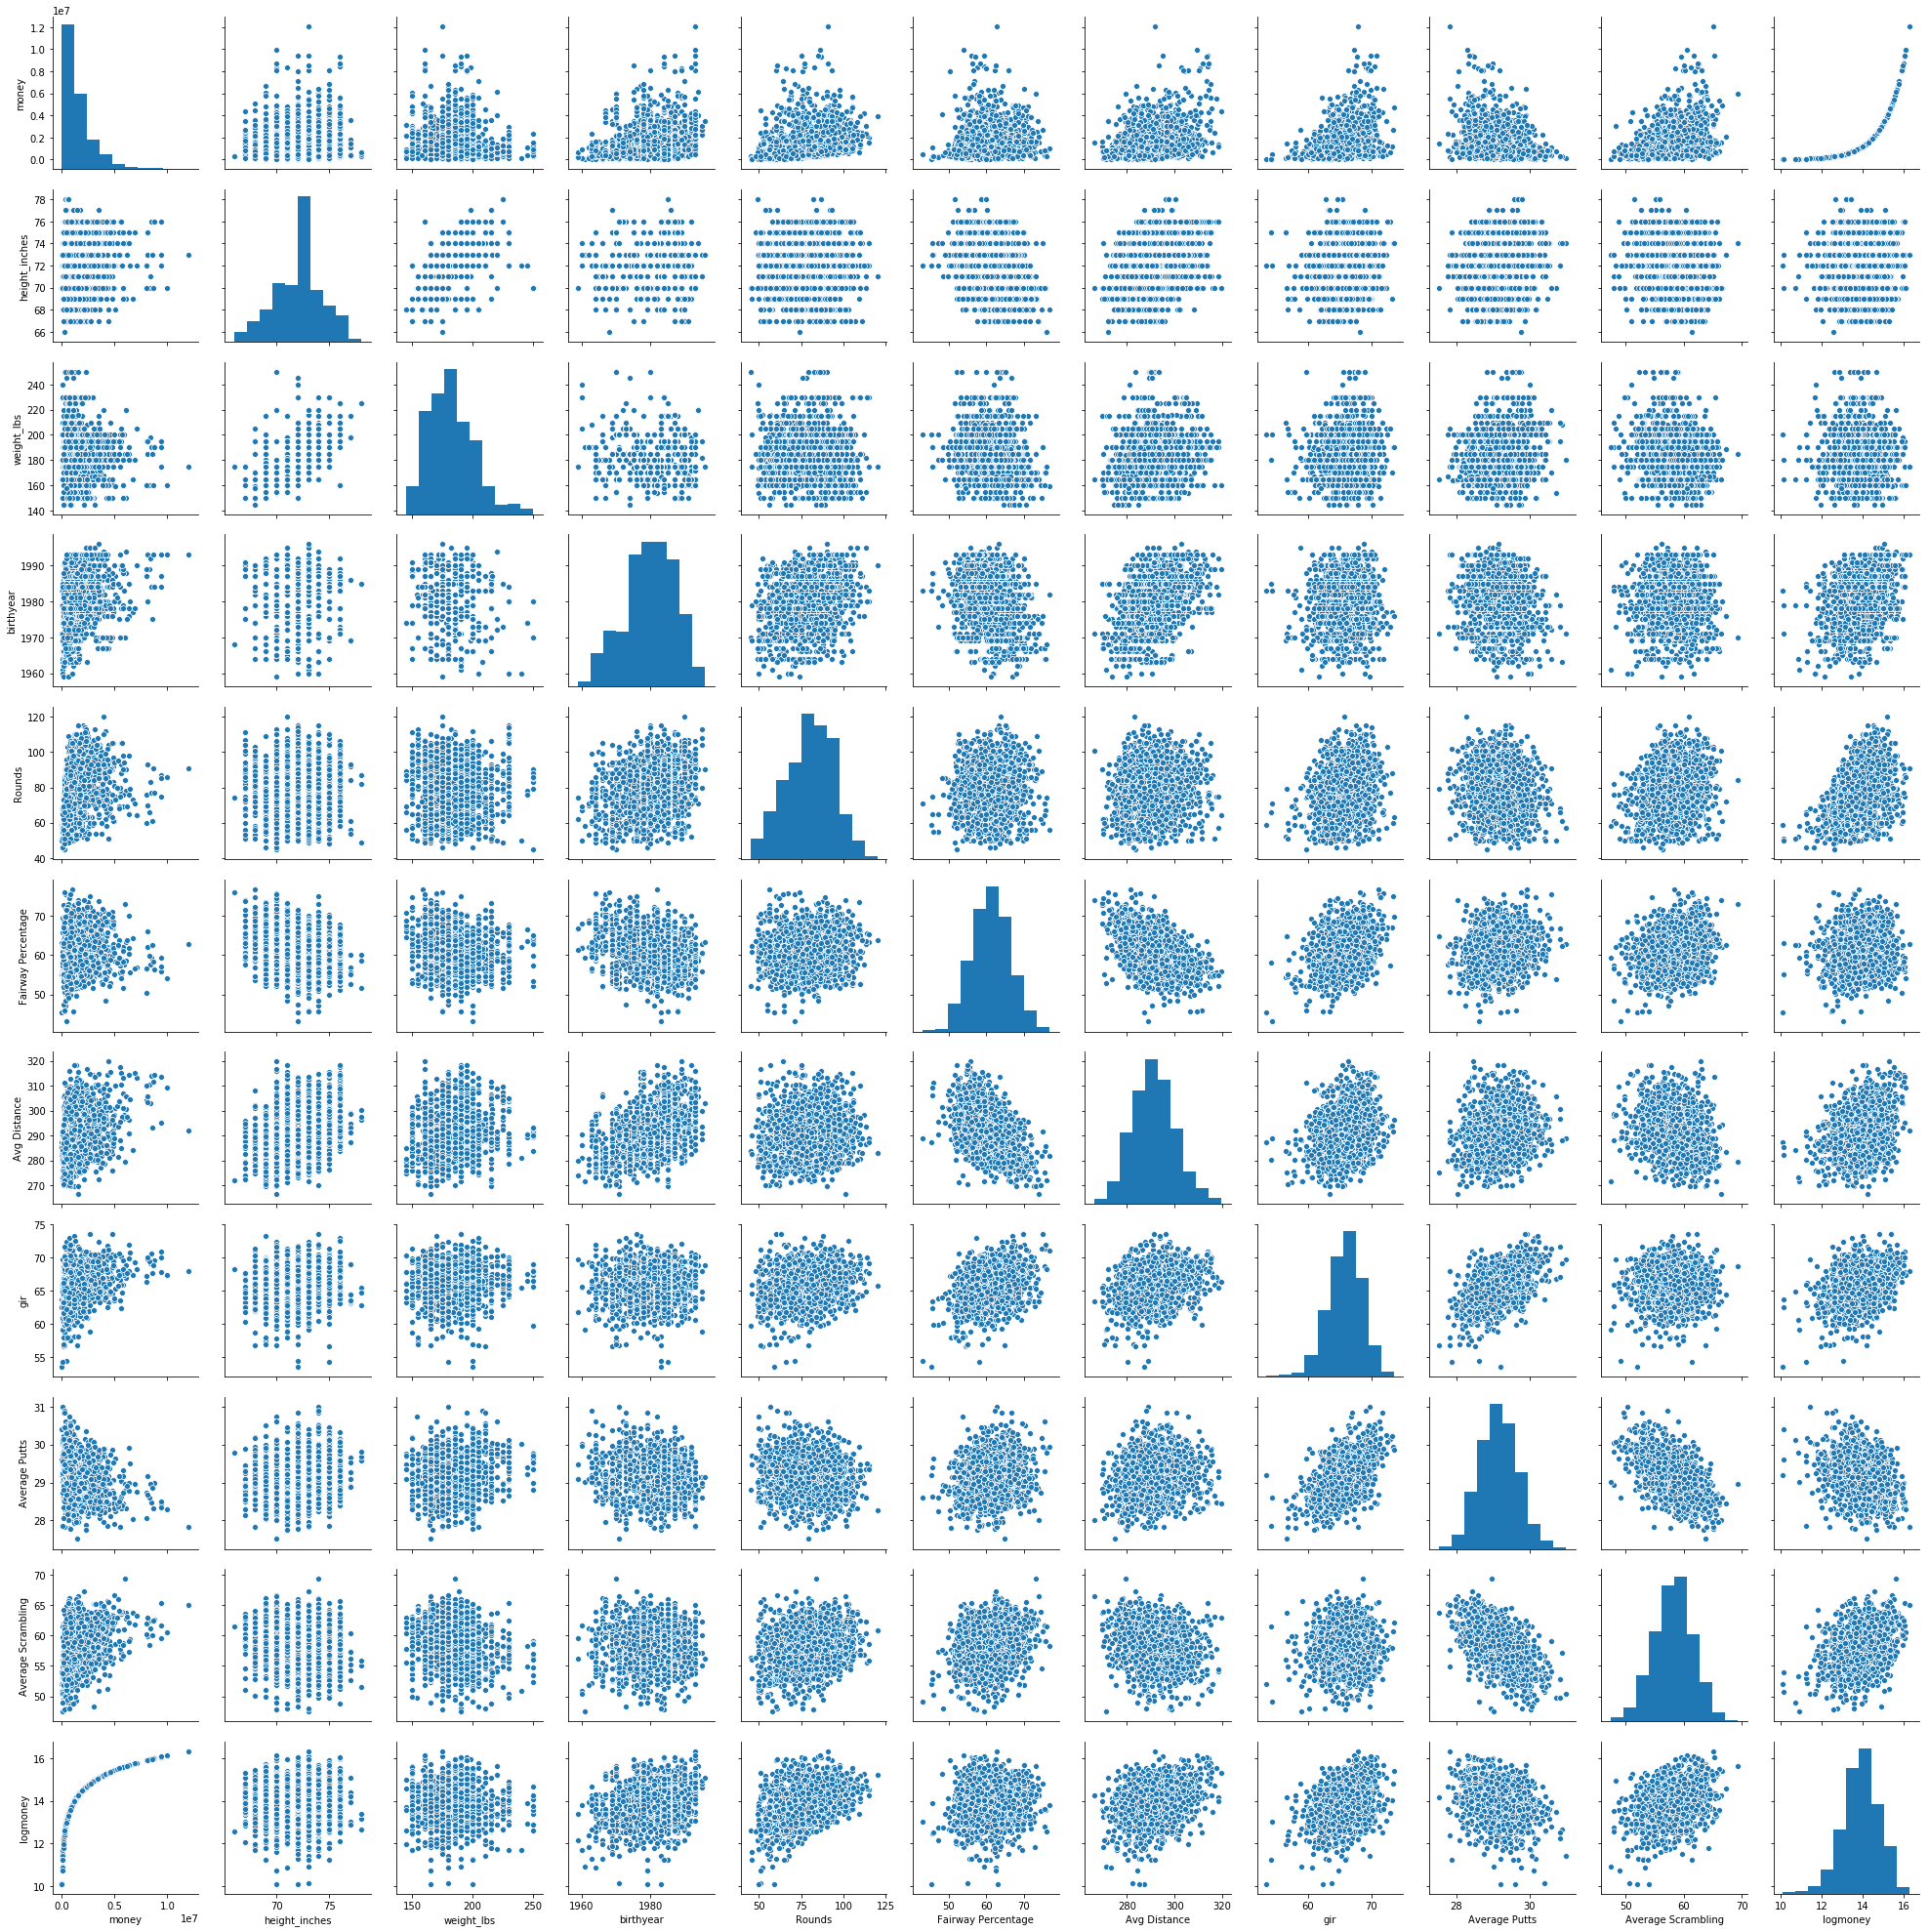

In [8]:
fig = sns.pairplot(g_small).set_syle=('dark')
#plt.savefig('logplot.png', transparent=False)
plt.show()
plt.close()

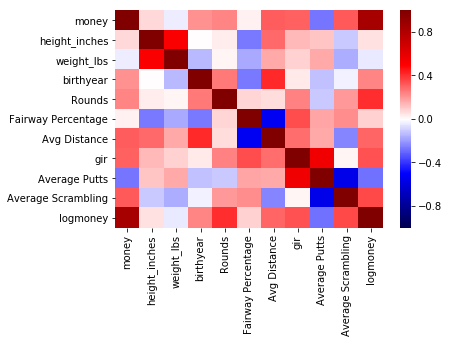

In [9]:
sns.heatmap(g_small.corr(), cmap='seismic', vmin=-1, vmax=1)
plt.show()
plt.close()

In [10]:
g_small.corr()

,money,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,logmoney
money,1.000000,0.076239,-0.032494,0.213610,0.239102,0.027474,0.316777,0.306611,-0.266828,0.320547,0.851547
height_inches,0.076239,1.000000,0.520670,0.003740,0.037186,-0.261061,0.293811,0.132858,0.115985,-0.105004,0.056130
weight_lbs,-0.032494,0.520670,1.000000,-0.135173,0.016704,-0.164263,0.169250,0.089212,0.167638,-0.163442,-0.039576
birthyear,0.213610,0.003740,-0.135173,1.000000,0.261021,-0.258962,0.416436,0.041995,-0.118160,-0.026150,0.238317
Rounds,0.239102,0.037186,0.016704,0.261021,1.000000,0.081012,0.067720,0.244681,-0.105069,0.202199,0.412711
Fairway Percentage,0.027474,-0.261061,-0.164263,-0.258962,0.081012,1.000000,-0.533872,0.349011,0.172919,0.225022,0.086300
Avg Distance,0.316777,0.293811,0.169250,0.416436,0.067720,-0.533872,1.000000,0.288542,0.166852,-0.238945,0.304358
gir,0.306611,0.132858,0.089212,0.041995,0.244681,0.349011,0.288542,1.000000,0.559709,0.019674,0.342803
Average Putts,-0.266828,0.115985,0.167638,-0.118160,-0.105069,0.172919,0.166852,0.559709,1.000000,-0.560378,-0.274065
Average Scrambling,0.320547,-0.105004,-0.163442,-0.026150,0.202199,0.225022,-0.238945,0.019674,-0.560378,1.000000,0.356164


In [49]:
#Simple validation method: train/validation/test  60-20-20

X, y = g_small.drop(['logmoney','money'], axis=1), g_small['logmoney']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=10)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')


lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly,y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression train R^2: 0.535
Linear Regression val R^2: 0.490
Ridge Regression train R^2: 0.535
Ridge Regression val R^2: 0.490
Degree 2 polynomial regression train R^2: 0.583
Degree 2 polynomial regression val R^2: 0.485


In [50]:
lm_reg.fit(X,y)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test, y_test):.3f}')

Ridge Regression val R^2: 0.571


In [13]:
lm.coef_

array([ 0.01788619, -0.00123255, -0.00272181,  0.01337253,  0.04698161,
        0.04254596,  0.13183419, -0.9257021 ,  0.00916275])

***
**Tweak model with lasso and ridge**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


/home/rob/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('height_inches', 0.014927307845093546),
 ('weight_lbs', -0.001156070809150902),
 ('birthyear', -0.0019657730959304403),
 ('Rounds', 0.01387796215922312),
 ('Fairway Percentage', 0.0463956414385629),
 ('Avg Distance', 0.04302050868171138),
 ('gir', 0.11761098164817345),
 ('Average Putts', -0.8132870656124556),
 ('Average Scrambling', 0.018410385806049836)]

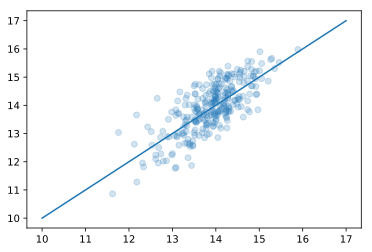

In [21]:
test_set_pred = lasso_model.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.2)
plt.plot(np.linspace(10,17,100), np.linspace(10,17,100))

In [17]:
r2_score(y_test, test_set_pred)

0.5649826825920945

In [22]:
lasso_model = Lasso(alpha = .01)
lasso_model.fit(X_train_scaled, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('height_inches', 0.020533426634669505),
 ('weight_lbs', -0.0019633420484075413),
 ('birthyear', -0.0),
 ('Rounds', 0.17738608642915576),
 ('Fairway Percentage', 0.20967446706366993),
 ('Avg Distance', 0.35166732586710264),
 ('gir', 0.3473797027007501),
 ('Average Putts', -0.45791390133526205),
 ('Average Scrambling', 0.037239567612704465)]

***

In [43]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train, y_train)
list(zip(X_train.columns, lr_model_ridge.coef_))

[('height_inches', 0.017859757009530724),
 ('weight_lbs', -0.0012448808070180573),
 ('birthyear', -0.0026765631386628077),
 ('Rounds', 0.013424525131983271),
 ('Fairway Percentage', 0.04697896154955925),
 ('Avg Distance', 0.04262832160799911),
 ('gir', 0.13037959877372485),
 ('Average Putts', -0.9138984954611988),
 ('Average Scrambling', 0.010219341801882739)]

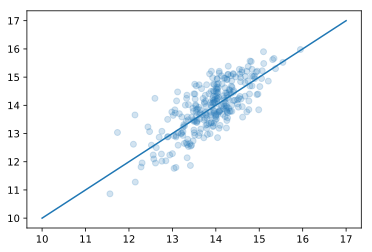

In [44]:
test_set_pred = lr_model_ridge.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.2)
plt.plot(np.linspace(10,17,100), np.linspace(10,17,100))

In [45]:
r2_score(y_test, test_set_pred)

0.5696037784727501

***

In [46]:
from sklearn.linear_model import lars_path

In [47]:
alphas, _, coefs = lars_path(X_train_scaled, y_train.values, method='lasso')

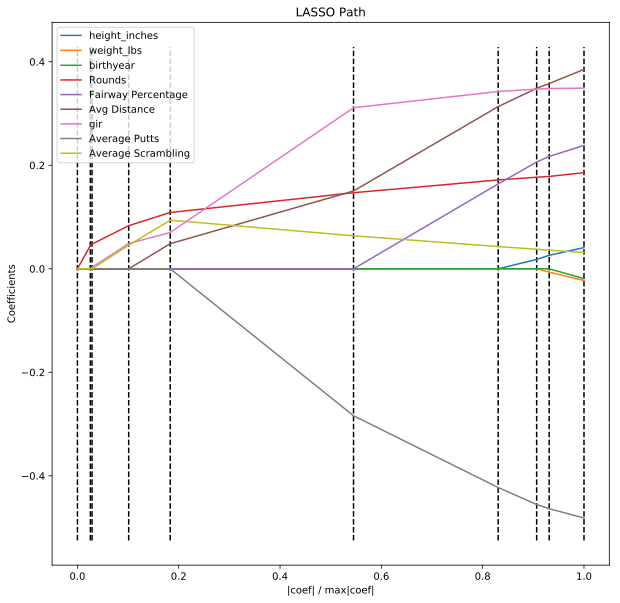

In [48]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()